## Configure R&S SMC100A frequency sweep

In [1]:
import visa

#### ResourceManager, write-read and query

In [112]:
rm = visa.ResourceManager()

In [3]:
rm

<ResourceManager(<VisaLibrary('C:\\windows\\system32\\visa64.dll')>)>

In [5]:
rm.list_resources()

('TCPIP0::dhcp-0135267981-51-6f.client.student.harvard.edu::inst0::INSTR',
 'TCPIP0::dhcp-140-247-189-103.fas.harvard.edu::inst0::INSTR',
 'TCPIP0::dhcp-140-247-189-113.fas.harvard.edu::inst0::INSTR',
 'TCPIP0::dhcp-140-247-189-218.fas.harvard.edu::inst0::INSTR',
 'TCPIP0::dhcp-140-247-189-25.fas.harvard.edu::inst0::INSTR',
 'TCPIP0::dhcp-140-247-189-30.fas.harvard.edu::inst0::INSTR',
 'TCPIP0::dhcp-140-247-189-98.fas.harvard.edu::inst0::INSTR',
 'TCPIP0::dhcp-140-247-189-146.fas.harvard.edu::inst0::INSTR',
 'TCPIP0::140.247.189.50::inst0::INSTR',
 'TCPIP0::140.247.189.150::inst0::INSTR',
 'ASRL3::INSTR',
 'GPIB0::1::INSTR',
 'GPIB0::29::INSTR')

In [113]:
rs_mw = rm.open_resource('GPIB0::29::INSTR')

In [7]:
rs_mw

<'GPIBInstrument'('GPIB0::29::INSTR')>

In [10]:
rs_mw.query('*IDN?')

'Rohde&Schwarz,SMC100A,1411.4002k02/102516,2.20.155.20\n'

In [11]:
rs_mw.write('*IDN?')

(7, <StatusCode.success: 0>)

In [12]:
rs_mw.read()

'Rohde&Schwarz,SMC100A,1411.4002k02/102516,2.20.155.20\n'

In [55]:
rs_mw.write('*RST')
rs_mw.write('*CLS')

(6, <StatusCode.success: 0>)

In [98]:
rs_mw.query(':OUTPut:IMPedance?')

'G50\n'

In [99]:
rs_mw.write(':OUTPut:STATE OFF')

(19, <StatusCode.success: 0>)

In [100]:
rs_mw.query(':OUTPut:STATE?')

'0\n'

In [101]:
rs_mw.write(':SOURce:POWer -30dBm')

(22, <StatusCode.success: 0>)

### Configure R&S SMC100A frequency sweep

In [42]:
rs_mw.query(':SOURce:FREQuency:MODE?')

'SWE\n'

In [61]:
rs_mw.write(':SOURce:FREQuency:MODE SWEep')

(27, <StatusCode.success: 0>)

In [60]:
# rs_mw.write(':SOURce:FREQuency:STARt 2 GHz')
# rs_mw.write(':SOURce:FREQuency:STOP 2.95 GHz')
# rs_mw.write(':SOURce:FREQuency:STEP 2 MHz')

(30, <StatusCode.success: 0>)

In [121]:
rs_mw.write('SOUR:SWE:FREQ:MODE STEP')
rs_mw.write('SOUR:SWE:FREQ:SPAC LIN')
rs_mw.write('SOUR:SWE:FREQ:STEP:LIN 1 kHz')
rs_mw.write('SOUR:FREQ:STAR 10 kHz')
rs_mw.write('SOUR:FREQ:STOP 20 kHz')
rs_mw.write('TRIG:FSW:SOUR EXT')
rs_mw.write('SOUR:FREQ:MODE SWE')

(20, <StatusCode.success: 0>)

In [122]:
rs_mw.write('SOUR:FREQ 10 kHz')

(18, <StatusCode.success: 0>)

In [93]:
rs_mw.write(':OUTPut:STATE ON')

(18, <StatusCode.success: 0>)

In [96]:
rs_mw.write(':OUTPut:STATE OFF')

(19, <StatusCode.success: 0>)

In [95]:
rs_mw.write(':SOURce:POWer -30dBm')

(22, <StatusCode.success: 0>)

## Configure NI PXIe-6363 card (SampleClock and Counter)

#### Import nidaqmx (problem with two different envs: base and qudi. Use qudi)

In [109]:
nidaqmx

NameError: name 'nidaqmx' is not defined

The problem is that qudi doesn't have `nidaqmx`

Check `base` environment

In [1]:
import sys

In [2]:
for i in sys.path:
    print(i)


C:\Users\Lukin SiV\qudi\notebooks
C:\Anaconda\python37.zip
C:\Program Files\Swabian Instruments\Time Tagger\driver\Python3.7\x64
C:\Anaconda\DLLs
C:\Anaconda\lib
C:\Anaconda
C:\Anaconda\lib\site-packages
C:\Anaconda\lib\site-packages\win32
C:\Anaconda\lib\site-packages\win32\lib
C:\Anaconda\lib\site-packages\Pythonwin
C:\Anaconda\lib\site-packages\IPython\extensions
C:\Users\Lukin SiV\.ipython


After
`activate qudi`
and
`pip install nidaqmx`

In [3]:
for i in sys.path:
    print(i)


C:\Anaconda\envs\qudi\python36.zip
C:\Program Files\Swabian Instruments\Time Tagger\driver\Python3.6\x64
C:\Anaconda\envs\qudi\DLLs
C:\Anaconda\envs\qudi\lib
C:\Anaconda\envs\qudi
C:\Anaconda\envs\qudi\lib\site-packages
C:\Anaconda\envs\qudi\lib\site-packages\IPython\extensions
C:\Users\Lukin SiV\.ipython


#### SampleClock signal generation: Ctr2

In [69]:
point_number = 100
sample_rate = 100

In [50]:
import nidaqmx
from nidaqmx.constants import AcquisitionType, Edge, READ_ALL_AVAILABLE

Create SampleClock task

In [73]:
clock_task = nidaqmx.Task()
clock_task.co_channels.add_co_pulse_chan_freq(counter='/PXI-6363/Ctr2', duty_cycle=0.5, freq=sample_rate)
clock_task.timing.cfg_implicit_timing(sample_mode=AcquisitionType.FINITE, samps_per_chan=point_number)

In [71]:
# clock_task.start()

In [66]:
# clock_task.stop()

In [72]:
# clock_task.stop()
# clock_task.close()

#### Photon counter: Ctr3

In [76]:
counter_task = nidaqmx.Task()

counter_task.ci_channels.add_ci_count_edges_chan(counter='/PXI-6363/Ctr3')

counter_task.timing.cfg_samp_clk_timing(
    source='/PXI-6363/Ctr2InternalOutput', 
    sample_mode=AcquisitionType.CONTINUOUS, 
    samps_per_chan=2*point_number, 
    rate=int(1e5),
    active_edge=Edge.RISING
)

In [77]:
counter_task.start()

In [78]:
clock_task.start()

In [83]:
# counter_task.read(number_of_samples_per_channel=READ_ALL_AVAILABLE)

[]

In [84]:
counter_task.stop()
counter_task.close()

In [85]:
clock_task.stop()
clock_task.close()

## ODMR sweep

In [186]:
import visa
import nidaqmx
from nidaqmx.constants import AcquisitionType, Edge, READ_ALL_AVAILABLE
import matplotlib.pyplot as plt
import time

In [188]:
rm = visa.ResourceManager()
rs_mw = rm.open_resource('GPIB0::29::INSTR')

In [53]:
# def setup_mw_source(dev=rs_mw, start_freq=2.80, stop_freq=2.95, step_number=75, power=-30):
#     command_wait(dev, '*RST')
#     command_wait(dev, '*CLS')
    
#     step_freq = (stop_freq - start_freq)/(step_number) * 1e3
#     print(step_freq)
    
# #     command_wait(dev, 'SOUR:FREQ {} Hz'.format(start_freq))
# #     command_wait(dev, 'SOUR:SWE:FREQ:MODE STEP')
# #     command_wait(dev, 'SOUR:SWE:FREQ:SPAC LIN')
# #     command_wait(dev, 'SOUR:SWE:FREQ:STEP:LIN {} Hz'.format(step_freq))
# #     command_wait(dev, 'SOUR:FREQ {} Hz'.format(start_freq))
#     command_wait(dev, 'TRIG:FSW:SOUR EXT')
#     command_wait(dev, 'SOUR:FREQ:MODE SWE')
# #     command_wait(dev, 'SOUR:FREQ:STEP:MODE USER')
#     command_wait(dev, 'SOUR:SWE:FREQ:MODE STEP')
#     command_wait(dev, 'SOUR:FREQ:STAR {} GHz'.format(start_freq))
#     command_wait(dev, 'SOUR:FREQ:STOP {} GHz'.format(stop_freq))
# #     command_wait(dev, 'SOUR:FREQ:STEP {} MHz'.format(step_freq))
#     command_wait(dev, ':SOURce:POWer {} dBm'.format(power))

In [172]:
def setup_mw_source(dev, start_freq=2.80, stop_freq=2.95, step_number=100, power=-30):
    command_wait(dev, '*RST')
    command_wait(dev, '*CLS')
    
    step_freq = (stop_freq - start_freq)/(step_number) * 1e3
    # print(step_freq)
    
    # Setup step-by-step sweep with external trigger
    command_wait(dev, 'SOUR:FREQ:MODE SWE')
    command_wait(dev, 'TRIG:FSW:SOUR EXT')
    command_wait(dev, 'SOUR:SWE:FREQ:MODE STEP')
    command_wait(dev, 'SOUR:SWE:FREQ:SPAC LIN')
    command_wait(dev, 'SOUR:SWE:FREQ:STEP:LIN {} MHz'.format(step_freq))
    command_wait(dev, 'SOUR:FREQ:STAR {} GHz'.format(start_freq))
    command_wait(dev, 'SOUR:FREQ:STOP {} GHz'.format(stop_freq))
    
    command_wait(dev, 'SOUR:POW:LEV {} dBm'.format(power))
    command_wait(dev, 'OUTPut:STATE ON')

def deactivate_mw_source(dev):
    command_wait(dev, 'OUTPut:STATE OFF')
    command_wait(dev, '*RST')
    command_wait(dev, '*CLS')
    
def command_wait(dev, command_str):
    dev.write(command_str)
    dev.write('*WAI')
    while int(float(dev.query('*OPC?'))) != 1:
        time.sleep(0.2)
    return

In [148]:
def setup_ni_card(sample_rate=100, step_number=100):
    # SampleClock task (Ctr2)
    clock_task = nidaqmx.Task()
    clock_task.co_channels.add_co_pulse_chan_freq(counter='/PXI-6363/Ctr2', duty_cycle=0.5, freq=sample_rate)
    clock_task.timing.cfg_implicit_timing(sample_mode=AcquisitionType.FINITE, samps_per_chan=step_number)
    
    # Photon counter task (Ctr3)
    counter_task = nidaqmx.Task()
    counter_task.ci_channels.add_ci_count_edges_chan(counter='/PXI-6363/Ctr3')
    counter_task.timing.cfg_samp_clk_timing(
        source='/PXI-6363/Ctr2InternalOutput', 
        sample_mode=AcquisitionType.CONTINUOUS, 
        samps_per_chan=2*step_number, 
        rate=int(1e5),
        active_edge=Edge.RISING
    )
    
    counter_task.start()
    
    return (clock_task, counter_task)

def deactivate_ni_card(clock_task, counter_task):
    try:
        clock_task.stop()
    except:
        pass
    clock_task.close()
    
    try:
        counter_task.stop()
    except:
        pass
    counter_task.close()

In [176]:
def norm_count(raw_count_line):
    count_line = []
    for i in range(len(raw_count_line)):
        if i>0:
            count_line.append(raw_count_line[i] - raw_count_line[i-1])
        
    return count_line

In [196]:
start_freq = 2.8
stop_freq = 2.95
step_number = 100
power = 1

sample_rate = 50
line_number = 100

clock, counter = setup_ni_card(sample_rate=sample_rate, step_number=step_number)

count_ar = []

for i in range(line_number):
    setup_mw_source(rs_mw, start_freq, stop_freq, step_number, power)
    
    clock.start()
    clock.wait_until_done(20)
    
    raw_count_line = counter.read(number_of_samples_per_channel=READ_ALL_AVAILABLE)
    count_line = norm_count(raw_count_line)
    
    count_ar.append(count_line)
    clock.stop()
    deactivate_mw_source(dev=rs_mw)

deactivate_mw_source(rs_mw)
deactivate_ni_card(clock_task=clock, counter_task=counter)

In [195]:
# deactivate_mw_source(rs_mw)
# deactivate_ni_card(clock_task=clock, counter_task=counter)

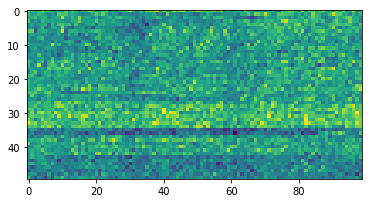

In [190]:
plt.imshow(count_ar)
plt.show()

In [192]:
avg_count_line = [sum(x) for x in zip(*count_ar)]

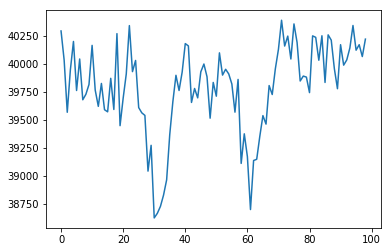

In [193]:
plt.plot(avg_count_line)
plt.show()

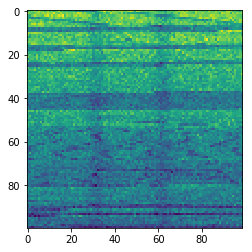

In [197]:
plt.imshow(count_ar)
plt.show()

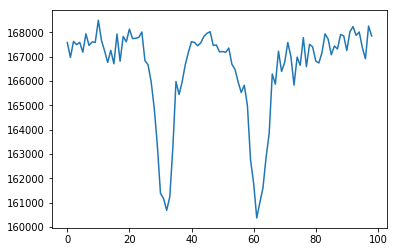

In [199]:
avg_count_line = [sum(x) for x in zip(*count_ar)]
plt.plot(avg_count_line)
plt.show()